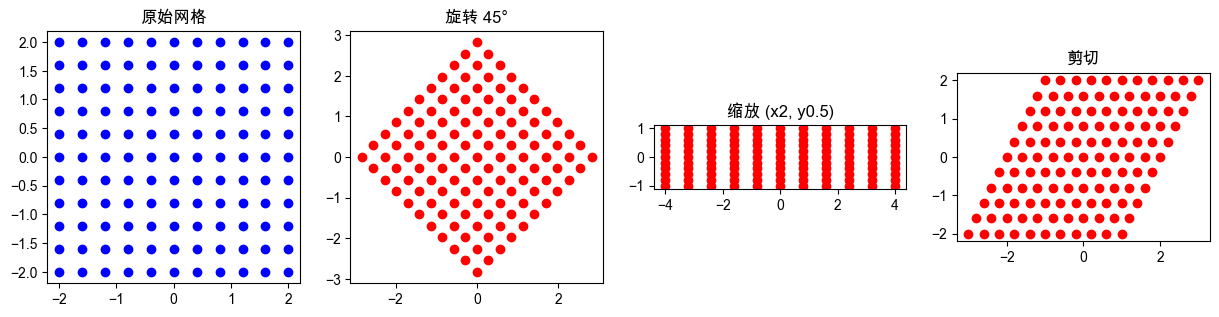

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.family'] = 'Arial Unicode MS' 

# ÂÆö‰πâÂéüÂßãÁΩëÊ†º
x = np.linspace(-2, 2, 11)
y = np.linspace(-2, 2, 11)
X, Y = np.meshgrid(x, y)
points = np.vstack([X.flatten(), Y.flatten()])

# ÂÆö‰πâ‰∏çÂêåÁöÑÁ∫øÊÄßÂèòÊç¢Áü©Èòµ
transforms = {
    "ÊóãËΩ¨ 45¬∞": np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
                       [np.sin(np.pi/4),  np.cos(np.pi/4)]]),
    "Áº©Êîæ (x2, y0.5)": np.array([[2, 0],
                               [0, 0.5]]),
    "Ââ™Âàá": np.array([[1, 0.5],
                      [0, 1]])
}

# ÁªòÂà∂ÂéüÂßã‰∏éÂèòÊç¢ÂêéÁöÑÁΩëÊ†º
fig, axes = plt.subplots(1, len(transforms)+1, figsize=(15,5))
axes[0].scatter(points[0], points[1], c='blue')
axes[0].set_title("ÂéüÂßãÁΩëÊ†º")
axes[0].set_aspect('equal')

for ax, (name, T) in zip(axes[1:], transforms.items()):
    transformed = T @ points
    ax.scatter(transformed[0], transformed[1], c='red')
    ax.set_title(name)
    ax.set_aspect('equal')

plt.show()


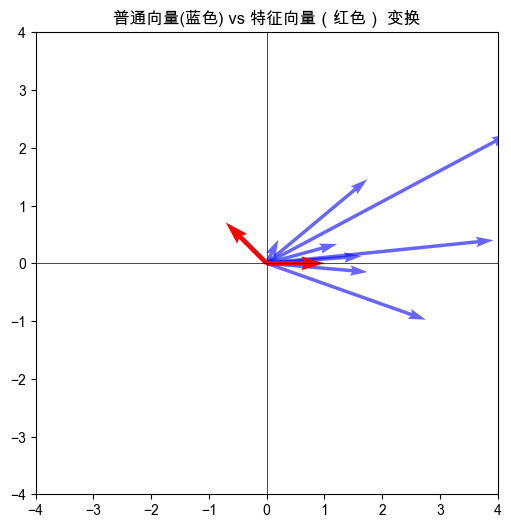

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# ÂÆö‰πâÁü©ÈòµÔºàÊØîÂ¶ÇÁº©Êîæ+Ââ™ÂàáÔºâ
A = np.array([[2, 1],
              [0, 1]])

# ÁâπÂæÅÂàÜËß£
eigvals, eigvecs = np.linalg.eig(A)

# ÂéüÂßãÂêëÈáèÈõÜÂêàÔºàÈöèÊú∫Âá†Êù°Ôºâ
np.random.seed(0)
vectors = np.random.randn(8, 2)

# ÁªòÂà∂Âä®Áîª
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_aspect('equal')
ax.set_title("ÊôÆÈÄöÂêëÈáè(ËìùËâ≤) vs ÁâπÂæÅÂêëÈáèÔºàÁ∫¢Ëâ≤Ôºâ ÂèòÊç¢")

quivers = ax.quiver([0]*len(vectors), [0]*len(vectors),
                    vectors[:,0], vectors[:,1],
                    color='blue', angles='xy', scale_units='xy', scale=1, alpha=0.6)

# ÁâπÂæÅÂêëÈáè
eig_quiver = ax.quiver([0]*len(eigvecs.T), [0]*len(eigvecs.T),
                       eigvecs[0,:], eigvecs[1,:],
                       color='red', angles='xy', scale_units='xy', scale=1, width=0.01)

def update(frame):
    global vectors
    transformed = (np.linalg.matrix_power(A, frame+1) @ vectors.T).T
    quivers.set_UVC(transformed[:,0], transformed[:,1])
    return quivers,

ani = animation.FuncAnimation(fig, update, frames=10, interval=800, blit=False)

# ‰øùÂ≠ò‰∏∫gifÔºàÈúÄË¶ÅÂÆâË£Ö PillowÔºâ
ani.save('linear_transform.gif', writer='pillow', fps=1)

HTML(ani.to_jshtml())


Â•áÂºÇÂÄºÂàÜËß£ (SVD) ËØ¶ÁªÜÂàÜÊûê
ÂéüÂßãÁü©Èòµ A (3x2):
[[3. 1.]
 [1. 3.]
 [1. 1.]]
Áü©ÈòµÂΩ¢Áä∂: (3, 2)

SVD ÂàÜËß£ÁªìÊûú: A = U @ S @ V^T

U Áü©Èòµ ((3, 3)):
[[-6.66666667e-01  7.07106781e-01 -2.35702260e-01]
 [-6.66666667e-01 -7.07106781e-01 -2.35702260e-01]
 [-3.33333333e-01  5.92577380e-18  9.42809042e-01]]

U ÁöÑÊÄßË¥®:
- U^T @ U = 
[[ 1.00000000e+00  3.97442027e-16 -4.23298126e-18]
 [ 3.97442027e-16  1.00000000e+00  5.22962323e-17]
 [-4.23298126e-18  5.22962323e-17  1.00000000e+00]]
- det(U) = 1.000000

Â•áÂºÇÂÄº œÉ:
[4.24264069 2.        ]

Œ£ Áü©Èòµ ((3, 2)):
[[4.24264069 0.        ]
 [0.         2.        ]
 [0.         0.        ]]

V^T Áü©Èòµ ((2, 2)):
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]

V Áü©Èòµ ((2, 2)):
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]

V ÁöÑÊÄßË¥®:
- V^T @ V = 
[[ 1.00000000e+00 -1.01465364e-17]
 [-1.01465364e-17  1.00000000e+00]]
- det(V) = 1.000000

ÈáçÊûÑÈ™åËØÅ:
ÂéüÁü©Èòµ A:
[[3. 1.]
 [1. 3.]
 [1. 1.]]
ÈáçÊûÑÁü©Èòµ U @ S @ V

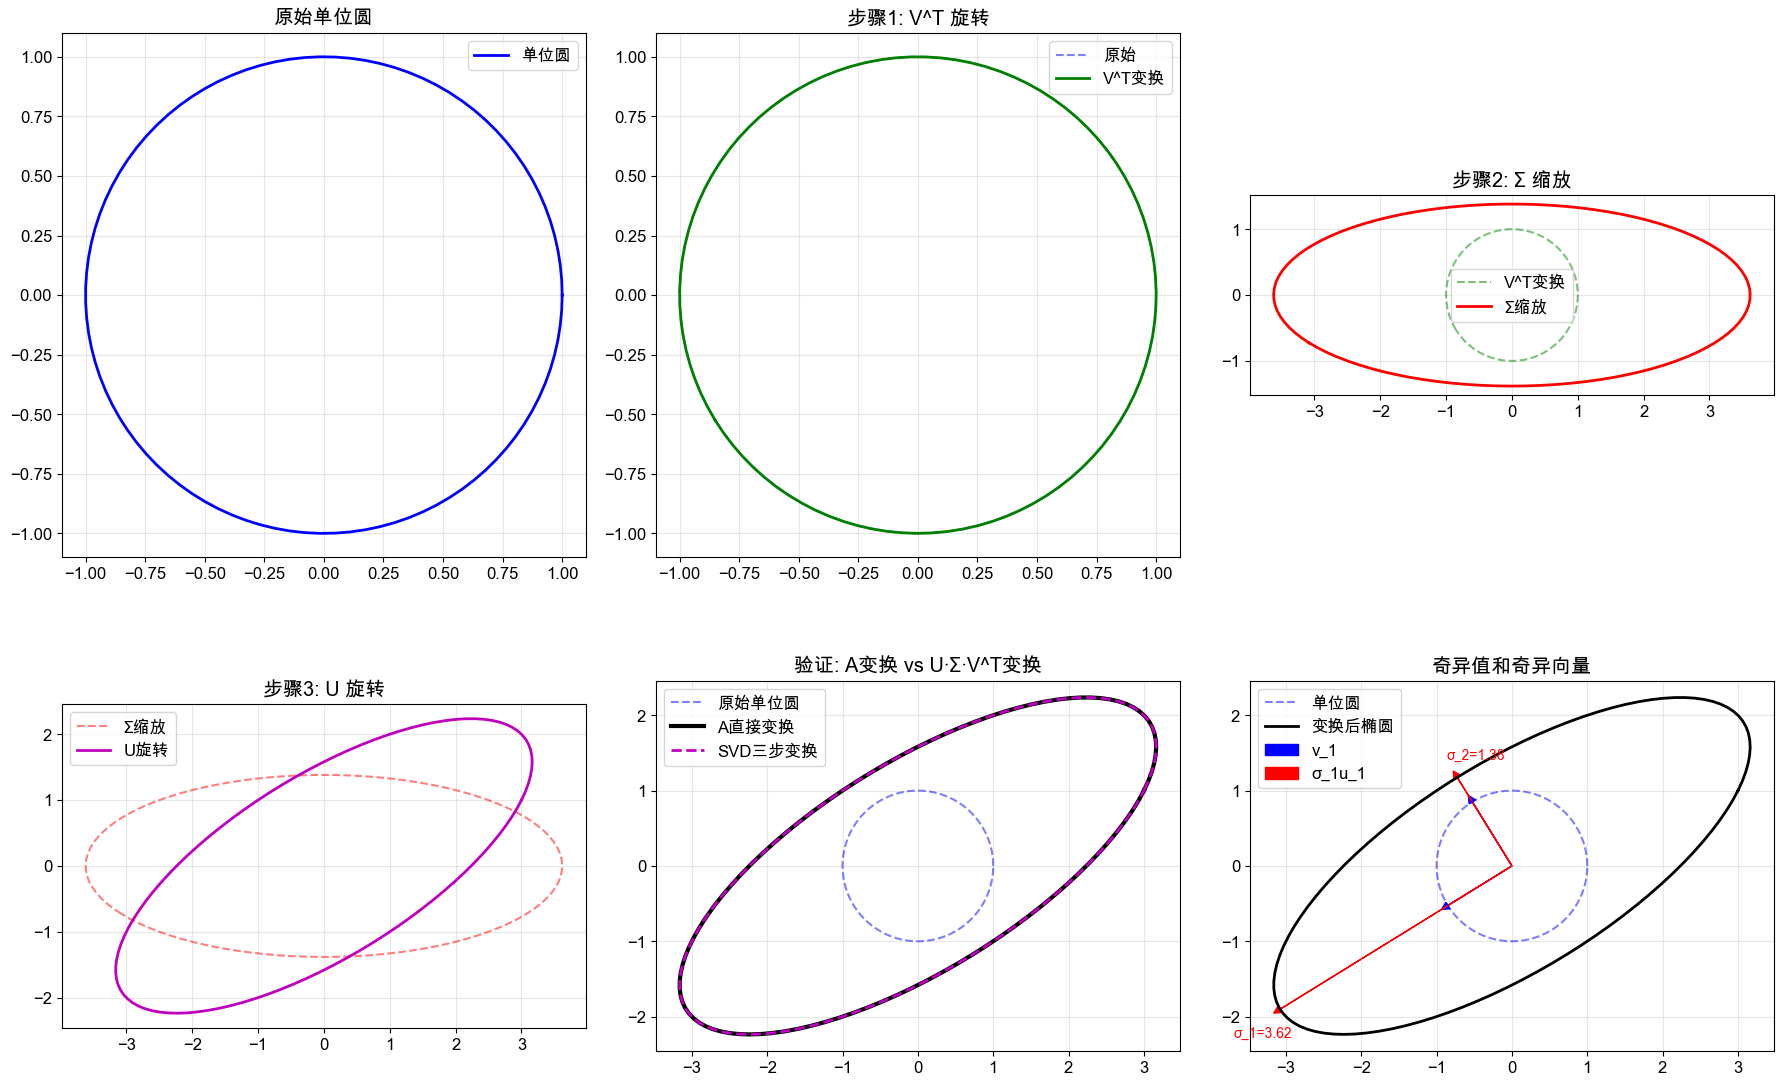


Âá†‰ΩïÂèòÊç¢ÂàÜÊûê:
Áü©Èòµ A = 
[[3 1]
 [1 2]]
Â•áÂºÇÂÄº: œÉ‚ÇÅ=3.618, œÉ‚ÇÇ=1.382
Êù°‰ª∂Êï∞: Œ∫(A) = œÉ_max/œÉ_min = 2.618

SVD Â∫îÁî®: Áü©ÈòµÁß©Âíå‰ΩéÁß©Ëøë‰ºº


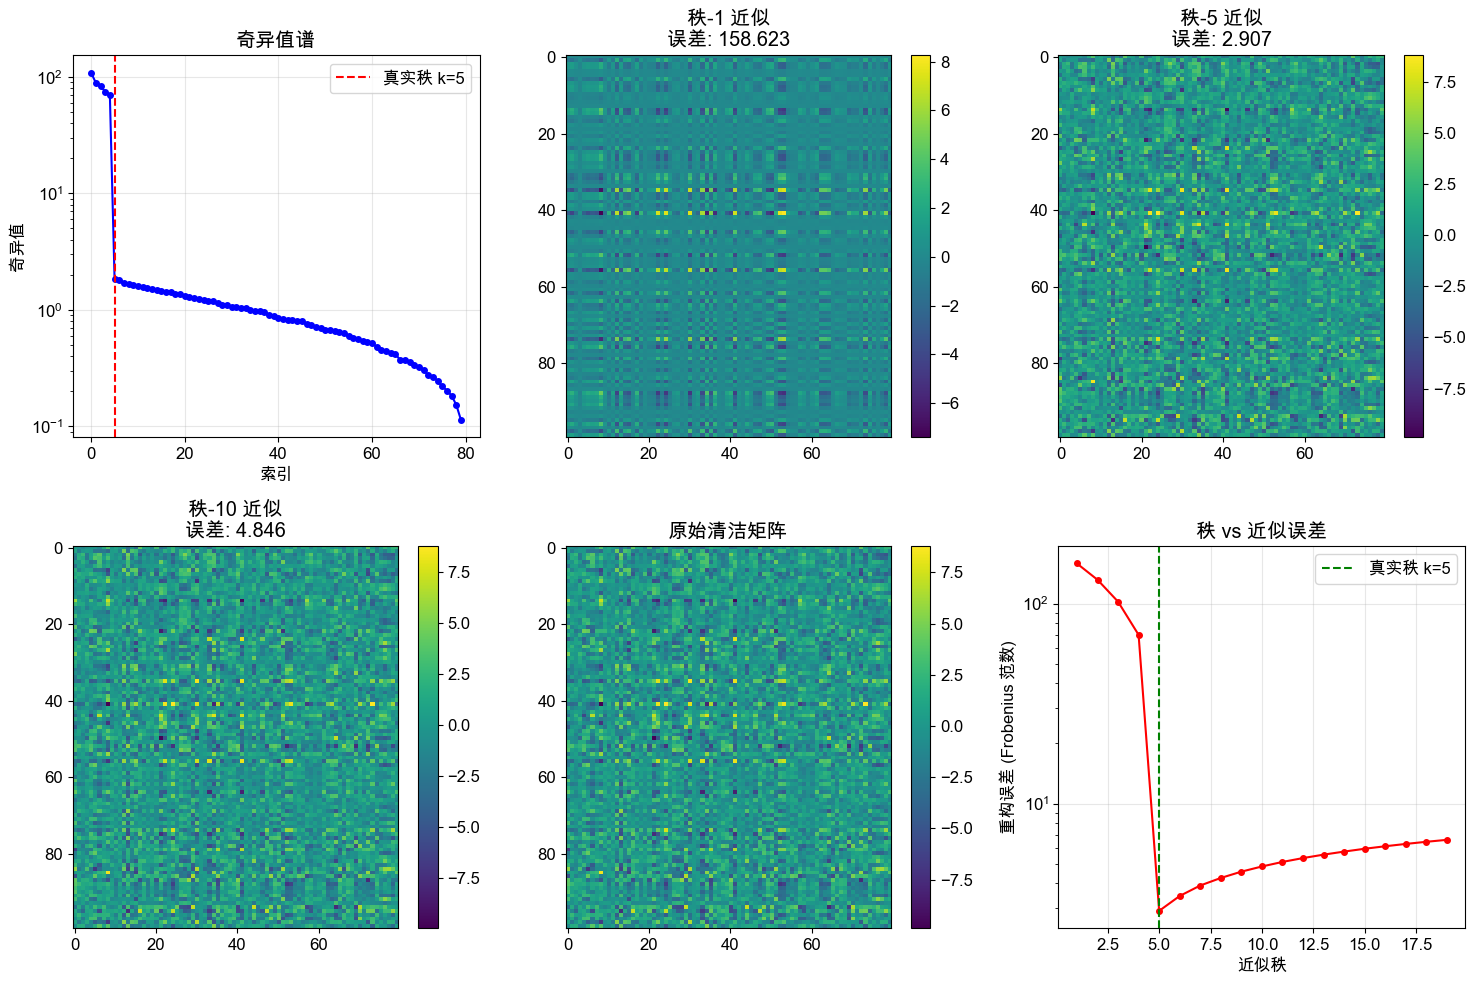

ÂéüÂßãÁü©ÈòµÂΩ¢Áä∂: (100, 80)
Áü©ÈòµÁöÑÊï∞ÂÄºÁß© (ÈòàÂÄº=1e-10): 80
ÊúâÊïàÁß© (ÈòàÂÄº=0.01): 80
Ââç5‰∏™Â•áÂºÇÂÄº: [108.35329032  88.70402993  82.73627633  74.7208655   69.74177222]

‰∫§‰∫íÂºè SVD ÂàÜÊûê


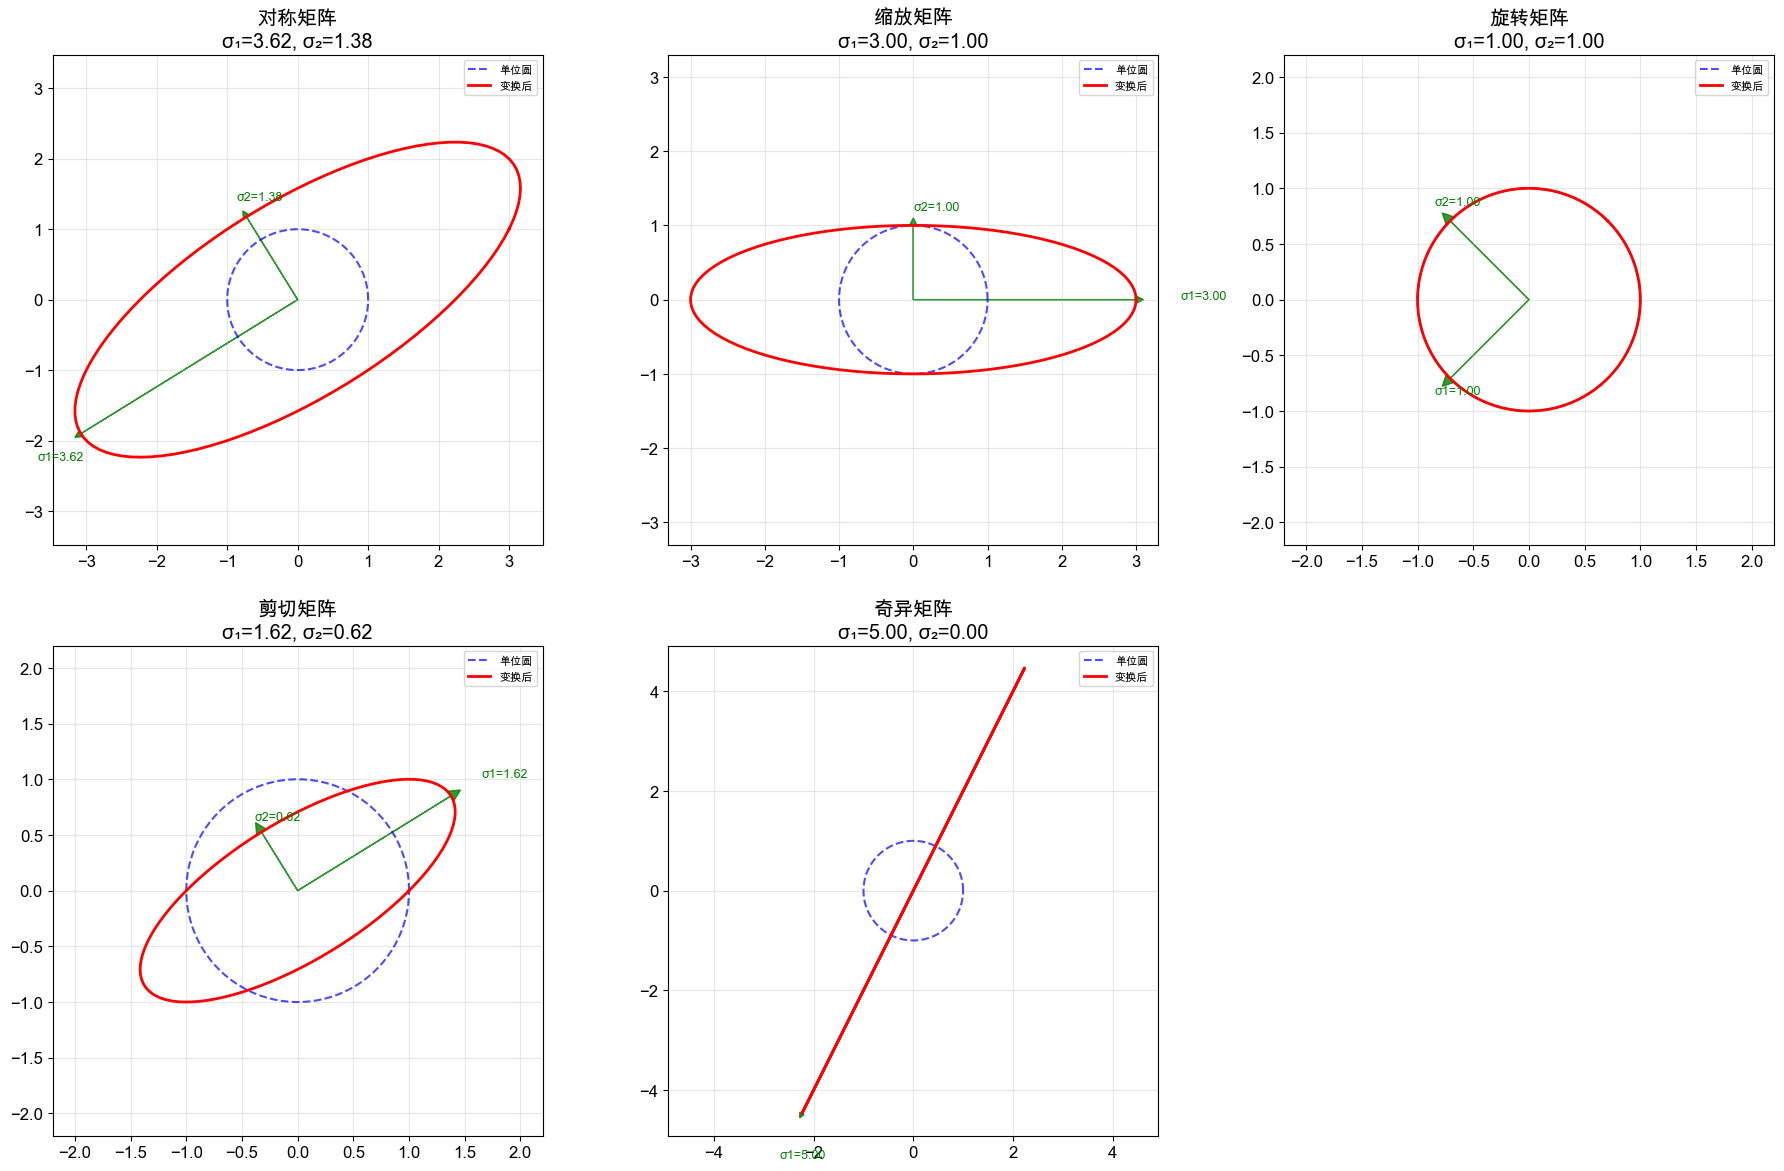


ÂØπÁß∞Áü©Èòµ:
  Áü©Èòµ: 
[[3 1]
 [1 2]]
  Â•áÂºÇÂÄº: [3.61803399 1.38196601]
  Êù°‰ª∂Êï∞: 2.62
  Êï∞ÂÄºÁß©: 2

Áº©ÊîæÁü©Èòµ:
  Áü©Èòµ: 
[[3 0]
 [0 1]]
  Â•áÂºÇÂÄº: [3. 1.]
  Êù°‰ª∂Êï∞: 3.00
  Êï∞ÂÄºÁß©: 2

ÊóãËΩ¨Áü©Èòµ:
  Áü©Èòµ: 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
  Â•áÂºÇÂÄº: [1. 1.]
  Êù°‰ª∂Êï∞: 1.00
  Êï∞ÂÄºÁß©: 2

Ââ™ÂàáÁü©Èòµ:
  Áü©Èòµ: 
[[1 1]
 [0 1]]
  Â•áÂºÇÂÄº: [1.61803399 0.61803399]
  Êù°‰ª∂Êï∞: 2.62
  Êï∞ÂÄºÁß©: 2

Â•áÂºÇÁü©Èòµ:
  Áü©Èòµ: 
[[1 2]
 [2 4]]
  Â•áÂºÇÂÄº: [5.00000000e+00 1.04061363e-16]
  Êù°‰ª∂Êï∞: inf
  Êï∞ÂÄºÁß©: 1

SVD ÊïôÁ®ãÂÆåÊàê!

ÂÖ≥ÈîÆË¶ÅÁÇπ:
1. SVD Â∞Ü‰ªª‰ΩïÁü©ÈòµÂàÜËß£‰∏∫ A = U¬∑Œ£¬∑V^T
2. U Âíå V ÊòØÊ≠£‰∫§Áü©ÈòµÔºåŒ£ ÊòØÂØπËßíÁü©Èòµ
3. Â•áÂºÇÂÄºÂèçÊò†‰∫ÜÁü©ÈòµÂú®‰∏çÂêåÊñπÂêë‰∏äÁöÑ'Êãâ‰º∏'Á®ãÂ∫¶
4. SVD Âú®ÈôçÁª¥„ÄÅÂéªÂô™„ÄÅÂéãÁº©Á≠âÈ¢ÜÂüüÊúâÈáçË¶ÅÂ∫îÁî®
5. Êù°‰ª∂Êï∞ = œÉ_max/œÉ_min Ë°°ÈáèÁü©ÈòµÁöÑÊï∞ÂÄºÁ®≥ÂÆöÊÄß


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, FancyArrowPatch
import matplotlib.patches as mpatches

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.family'] = 'Arial Unicode MS' 
plt.rcParams['font.size'] = 12

def detailed_svd_analysis():
    """ËØ¶ÁªÜÁöÑSVDÂàÜÊûêÂíåÂèØËßÜÂåñ"""
    
    # 1. ÂÆö‰πâÁü©Èòµ A
    print("=" * 50)
    print("Â•áÂºÇÂÄºÂàÜËß£ (SVD) ËØ¶ÁªÜÂàÜÊûê")
    print("=" * 50)
    
    A = np.array([[3, 1],
                  [1, 3],
                  [1, 1]], dtype=float)
    
    print("ÂéüÂßãÁü©Èòµ A (3x2):")
    print(A)
    print(f"Áü©ÈòµÂΩ¢Áä∂: {A.shape}")
    
    # 2. ÊâßË°åSVDÂàÜËß£
    U, s, VT = np.linalg.svd(A, full_matrices=True)
    
    # ÊûÑÈÄ†ÂÆåÊï¥ÁöÑŒ£Áü©Èòµ
    m, n = A.shape
    S = np.zeros((m, n))
    S[:min(m,n), :min(m,n)] = np.diag(s)
    
    print("\n" + "=" * 30)
    print("SVD ÂàÜËß£ÁªìÊûú: A = U @ S @ V^T")
    print("=" * 30)
    
    print(f"\nU Áü©Èòµ ({U.shape}):")
    print(U)
    print("\nU ÁöÑÊÄßË¥®:")
    print(f"- U^T @ U = \n{U.T @ U}")
    print(f"- det(U) = {np.linalg.det(U):.6f}")
    
    print(f"\nÂ•áÂºÇÂÄº œÉ:")
    print(s)
    print(f"\nŒ£ Áü©Èòµ ({S.shape}):")
    print(S)
    
    print(f"\nV^T Áü©Èòµ ({VT.shape}):")
    print(VT)
    print(f"\nV Áü©Èòµ ({VT.T.shape}):")
    V = VT.T
    print(V)
    print("\nV ÁöÑÊÄßË¥®:")
    print(f"- V^T @ V = \n{V.T @ V}")
    print(f"- det(V) = {np.linalg.det(V):.6f}")
    
    # 3. È™åËØÅÂàÜËß£
    A_reconstructed = U @ S @ VT
    print(f"\nÈáçÊûÑÈ™åËØÅ:")
    print(f"ÂéüÁü©Èòµ A:")
    print(A)
    print(f"ÈáçÊûÑÁü©Èòµ U @ S @ V^T:")
    print(A_reconstructed)
    print(f"ÈáçÊûÑËØØÂ∑Æ (FrobeniusËåÉÊï∞): {np.linalg.norm(A - A_reconstructed):.10f}")
    
    return A, U, s, S, VT, V

def step_by_step_calculation():
    """ÈÄêÊ≠•ËÆ°ÁÆóSVDÁöÑÊï∞Â≠¶ËøáÁ®ã"""
    
    print("\n" + "=" * 50)
    print("SVD ÈÄêÊ≠•ËÆ°ÁÆóËøáÁ®ã")
    print("=" * 50)
    
    A = np.array([[3, 1],
                  [1, 3],
                  [1, 1]], dtype=float)
    
    print("Ê≠•È™§1: ËÆ°ÁÆó A^T @ A")
    ATA = A.T @ A
    print(f"A^T @ A = \n{ATA}")
    
    print("\nÊ≠•È™§2: Ê±Ç A^T @ A ÁöÑÁâπÂæÅÂÄºÂíåÁâπÂæÅÂêëÈáè")
    eigenvals_ATA, eigenvecs_ATA = np.linalg.eig(ATA)
    
    # ÊåâÁâπÂæÅÂÄºÈôçÂ∫èÊéíÂàó
    idx = np.argsort(eigenvals_ATA)[::-1]
    eigenvals_ATA = eigenvals_ATA[idx]
    eigenvecs_ATA = eigenvecs_ATA[:, idx]
    
    print(f"ÁâπÂæÅÂÄº: {eigenvals_ATA}")
    print(f"ÁâπÂæÅÂêëÈáèÁü©Èòµ V = \n{eigenvecs_ATA}")
    
    print("\nÊ≠•È™§3: ËÆ°ÁÆóÂ•áÂºÇÂÄº")
    singular_values = np.sqrt(eigenvals_ATA)
    print(f"Â•áÂºÇÂÄº œÉ = ‚àöŒª: {singular_values}")
    
    print("\nÊ≠•È™§4: ËÆ°ÁÆó A @ A^T")
    AAT = A @ A.T
    print(f"A @ A^T = \n{AAT}")
    
    print("\nÊ≠•È™§5: Ê±Ç A @ A^T ÁöÑÁâπÂæÅÂêëÈáèÂæóÂà∞ U")
    eigenvals_AAT, eigenvecs_AAT = np.linalg.eig(AAT)
    
    # ÊåâÁâπÂæÅÂÄºÈôçÂ∫èÊéíÂàó
    idx = np.argsort(eigenvals_AAT)[::-1]
    eigenvals_AAT = eigenvals_AAT[idx]
    eigenvecs_AAT = eigenvecs_AAT[:, idx]
    
    print(f"A @ A^T ÁöÑÁâπÂæÅÂÄº: {eigenvals_AAT}")
    print(f"U Áü©Èòµ = \n{eigenvecs_AAT}")
    
    print("\nÊ≠•È™§6: È™åËØÅÂÖ≥Á≥ª A @ v_i = œÉ_i @ u_i")
    for i in range(min(len(singular_values), 2)):
        if singular_values[i] > 1e-10:  # ÈÅøÂÖçÈô§Èõ∂
            Av = A @ eigenvecs_ATA[:, i]
            sigma_u = singular_values[i] * eigenvecs_AAT[:, i]
            print(f"i={i}: A @ v_{i} = {Av}")
            print(f"      œÉ_{i} @ u_{i} = {sigma_u}")
            print(f"      ËØØÂ∑Æ: {np.linalg.norm(Av - sigma_u):.10f}")

def geometric_visualization():
    """Âá†‰ΩïÂèØËßÜÂåñSVDÁöÑ‰ΩúÁî®"""
    
    # ÂàõÂª∫2x2Áü©Èòµ‰æø‰∫éÂèØËßÜÂåñ
    A = np.array([[3, 1],
                  [1, 2]])
    
    U, s, VT = np.linalg.svd(A)
    V = VT.T
    
    # ÁîüÊàêÂçï‰ΩçÂúÜ‰∏äÁöÑÁÇπ
    theta = np.linspace(0, 2*np.pi, 100)
    unit_circle = np.array([np.cos(theta), np.sin(theta)])
    
    # SVDÂèòÊç¢ÁöÑ‰∏â‰∏™Ê≠•È™§
    step1 = VT @ unit_circle  # Á¨¨‰∏ÄÊ≠•: ÊóãËΩ¨/ÂèçÂ∞Ñ (V^T)
    step2 = np.diag(s) @ step1  # Á¨¨‰∫åÊ≠•: Áº©Êîæ (Œ£)
    step3 = U @ step2  # Á¨¨‰∏âÊ≠•: ÊóãËΩ¨/ÂèçÂ∞Ñ (U)
    
    # Áõ¥Êé•ÂèòÊç¢
    direct_transform = A @ unit_circle
    
    # ÂàõÂª∫ÂèØËßÜÂåñ
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Á¨¨‰∏ÄË°åÔºöSVD‰∏âÊ≠•ÂèòÊç¢
    # ÂéüÂßãÂçï‰ΩçÂúÜ
    axes[0,0].plot(unit_circle[0], unit_circle[1], 'b-', linewidth=2, label='Âçï‰ΩçÂúÜ')
    axes[0,0].set_aspect('equal')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].set_title('ÂéüÂßãÂçï‰ΩçÂúÜ')
    axes[0,0].legend()
    
    # Ê≠•È™§1: V^TÂèòÊç¢
    axes[0,1].plot(unit_circle[0], unit_circle[1], 'b--', alpha=0.5, label='ÂéüÂßã')
    axes[0,1].plot(step1[0], step1[1], 'g-', linewidth=2, label='V^TÂèòÊç¢')
    axes[0,1].set_aspect('equal')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].set_title('Ê≠•È™§1: V^T ÊóãËΩ¨')
    axes[0,1].legend()
    
    # Ê≠•È™§2: Œ£ÂèòÊç¢
    axes[0,2].plot(step1[0], step1[1], 'g--', alpha=0.5, label='V^TÂèòÊç¢')
    axes[0,2].plot(step2[0], step2[1], 'r-', linewidth=2, label='Œ£Áº©Êîæ')
    axes[0,2].set_aspect('equal')
    axes[0,2].grid(True, alpha=0.3)
    axes[0,2].set_title('Ê≠•È™§2: Œ£ Áº©Êîæ')
    axes[0,2].legend()
    
    # Á¨¨‰∫åË°åÔºöÂÆåÊï¥ËøáÁ®ã
    # Ê≠•È™§3: UÂèòÊç¢
    axes[1,0].plot(step2[0], step2[1], 'r--', alpha=0.5, label='Œ£Áº©Êîæ')
    axes[1,0].plot(step3[0], step3[1], 'm-', linewidth=2, label='UÊóãËΩ¨')
    axes[1,0].set_aspect('equal')
    axes[1,0].grid(True, alpha=0.3)
    axes[1,0].set_title('Ê≠•È™§3: U ÊóãËΩ¨')
    axes[1,0].legend()
    
    # ÂØπÊØîÔºöÁõ¥Êé•ÂèòÊç¢ vs SVDÂèòÊç¢
    axes[1,1].plot(unit_circle[0], unit_circle[1], 'b--', alpha=0.5, label='ÂéüÂßãÂçï‰ΩçÂúÜ')
    axes[1,1].plot(direct_transform[0], direct_transform[1], 'k-', linewidth=3, label='AÁõ¥Êé•ÂèòÊç¢')
    axes[1,1].plot(step3[0], step3[1], 'm--', linewidth=2, label='SVD‰∏âÊ≠•ÂèòÊç¢')
    axes[1,1].set_aspect('equal')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].set_title('È™åËØÅ: AÂèòÊç¢ vs U¬∑Œ£¬∑V^TÂèòÊç¢')
    axes[1,1].legend()
    
    # Â•áÂºÇÂÄºÂíåÂ•áÂºÇÂêëÈáèÂèØËßÜÂåñ
    axes[1,2].plot(unit_circle[0], unit_circle[1], 'b--', alpha=0.5, label='Âçï‰ΩçÂúÜ')
    axes[1,2].plot(direct_transform[0], direct_transform[1], 'k-', linewidth=2, label='ÂèòÊç¢ÂêéÊ§≠ÂúÜ')
    
    # ÁªòÂà∂‰∏ªËΩ¥ÊñπÂêë
    for i in range(2):
        # Âè≥Â•áÂºÇÂêëÈáè (ËæìÂÖ•Á©∫Èó¥)
        axes[1,2].arrow(0, 0, V[0,i], V[1,i], head_width=0.1, head_length=0.1, 
                       fc='blue', ec='blue', label=f'v_{i+1}' if i==0 else '')
        
        # Â∑¶Â•áÂºÇÂêëÈáè (ËæìÂá∫Á©∫Èó¥)ÔºåÊåâÂ•áÂºÇÂÄºÁº©Êîæ
        axes[1,2].arrow(0, 0, U[0,i]*s[i], U[1,i]*s[i], head_width=0.1, head_length=0.1,
                       fc='red', ec='red', label=f'œÉ_{i+1}u_{i+1}' if i==0 else '')
        
        # Ê†áÊ≥®Â•áÂºÇÂÄº
        axes[1,2].text(U[0,i]*s[i]*1.2, U[1,i]*s[i]*1.2, f'œÉ_{i+1}={s[i]:.2f}', 
                      fontsize=10, color='red')
    
    axes[1,2].set_aspect('equal')
    axes[1,2].grid(True, alpha=0.3)
    axes[1,2].set_title('Â•áÂºÇÂÄºÂíåÂ•áÂºÇÂêëÈáè')
    axes[1,2].legend()
    
    plt.tight_layout()
    plt.show()
    
    # ÊâìÂç∞Êï∞ÂÄº‰ø°ÊÅØ
    print("\nÂá†‰ΩïÂèòÊç¢ÂàÜÊûê:")
    print(f"Áü©Èòµ A = \n{A}")
    print(f"Â•áÂºÇÂÄº: œÉ‚ÇÅ={s[0]:.3f}, œÉ‚ÇÇ={s[1]:.3f}")
    print(f"Êù°‰ª∂Êï∞: Œ∫(A) = œÉ_max/œÉ_min = {s[0]/s[1]:.3f}")

def rank_and_approximation_demo():
    """Áü©ÈòµÁß©Âíå‰ΩéÁß©Ëøë‰ººÊºîÁ§∫"""
    
    print("\n" + "=" * 50)
    print("SVD Â∫îÁî®: Áü©ÈòµÁß©Âíå‰ΩéÁß©Ëøë‰ºº")
    print("=" * 50)
    
    # ÂàõÂª∫‰∏Ä‰∏™ÊúâÂô™Â£∞ÁöÑ‰ΩéÁß©Áü©Èòµ
    np.random.seed(42)
    m, n, k = 100, 80, 5  # Áü©ÈòµÂ§ßÂ∞èÂíåÁúüÂÆûÁß©
    
    # ÁîüÊàêÁúüÂÆûÁöÑ‰ΩéÁß©Áü©Èòµ
    U_true = np.random.randn(m, k)
    V_true = np.random.randn(n, k)
    A_clean = U_true @ V_true.T
    
    # Ê∑ªÂä†Âô™Â£∞
    noise_level = 0.1
    noise = noise_level * np.random.randn(m, n)
    A_noisy = A_clean + noise
    
    # SVDÂàÜËß£
    U, s, VT = np.linalg.svd(A_noisy, full_matrices=False)
    
    # ËÆ°ÁÆó‰∏çÂêåÁß©ÁöÑËøë‰ºº
    ranks = [1, 2, 5, 10, 20]
    errors = []
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Â•áÂºÇÂÄºÂõæ
    axes[0,0].semilogy(s, 'bo-', markersize=4)
    axes[0,0].axvline(k, color='r', linestyle='--', label=f'ÁúüÂÆûÁß© k={k}')
    axes[0,0].set_xlabel('Á¥¢Âºï')
    axes[0,0].set_ylabel('Â•áÂºÇÂÄº')
    axes[0,0].set_title('Â•áÂºÇÂÄºË∞±')
    axes[0,0].grid(True, alpha=0.3)
    axes[0,0].legend()
    
    # ‰∏çÂêåÁß©ÁöÑËøë‰ºº
    for i, r in enumerate([1, 5, 10]):
        if i < 3:
            A_approx = U[:, :r] @ np.diag(s[:r]) @ VT[:r, :]
            error = np.linalg.norm(A_clean - A_approx, 'fro')
            errors.append(error)
            
            row, col = (0, i+1) if i < 2 else (1, 0)
            im = axes[row, col].imshow(A_approx, cmap='viridis', aspect='auto')
            axes[row, col].set_title(f'Áß©-{r} Ëøë‰ºº\nËØØÂ∑Æ: {error:.3f}')
            plt.colorbar(im, ax=axes[row, col])
    
    # ÂéüÂßãÁü©Èòµ
    im = axes[1,1].imshow(A_clean, cmap='viridis', aspect='auto')
    axes[1,1].set_title('ÂéüÂßãÊ∏ÖÊ¥ÅÁü©Èòµ')
    plt.colorbar(im, ax=axes[1,1])
    
    # ËØØÂ∑ÆÂàÜÊûê
    full_errors = []
    for r in range(1, min(20, len(s))):
        A_approx = U[:, :r] @ np.diag(s[:r]) @ VT[:r, :]
        error = np.linalg.norm(A_clean - A_approx, 'fro')
        full_errors.append(error)
    
    axes[1,2].semilogy(range(1, len(full_errors)+1), full_errors, 'ro-', markersize=4)
    axes[1,2].axvline(k, color='g', linestyle='--', label=f'ÁúüÂÆûÁß© k={k}')
    axes[1,2].set_xlabel('Ëøë‰ººÁß©')
    axes[1,2].set_ylabel('ÈáçÊûÑËØØÂ∑Æ (Frobenius ËåÉÊï∞)')
    axes[1,2].set_title('Áß© vs Ëøë‰ººËØØÂ∑Æ')
    axes[1,2].grid(True, alpha=0.3)
    axes[1,2].legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"ÂéüÂßãÁü©ÈòµÂΩ¢Áä∂: {A_noisy.shape}")
    print(f"Áü©ÈòµÁöÑÊï∞ÂÄºÁß© (ÈòàÂÄº=1e-10): {np.sum(s > 1e-10)}")
    print(f"ÊúâÊïàÁß© (ÈòàÂÄº=0.01): {np.sum(s > 0.01)}")
    print(f"Ââç5‰∏™Â•áÂºÇÂÄº: {s[:5]}")

def interactive_svd_demo():
    """‰∫§‰∫íÂºèSVDÊºîÁ§∫"""
    
    print("\n" + "=" * 50)
    print("‰∫§‰∫íÂºè SVD ÂàÜÊûê")
    print("=" * 50)
    
    # È¢ÑÂÆö‰πâÂá†‰∏™ÊúâË∂£ÁöÑÁü©Èòµ
    matrices = {
        "ÂØπÁß∞Áü©Èòµ": np.array([[3, 1], [1, 2]]),
        "Áº©ÊîæÁü©Èòµ": np.array([[3, 0], [0, 1]]),
        "ÊóãËΩ¨Áü©Èòµ": np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)], 
                           [np.sin(np.pi/4), np.cos(np.pi/4)]]),
        "Ââ™ÂàáÁü©Èòµ": np.array([[1, 1], [0, 1]]),
        "Â•áÂºÇÁü©Èòµ": np.array([[1, 2], [2, 4]])
    }
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    for idx, (name, A) in enumerate(matrices.items()):
        if idx >= 5:  # ÊúÄÂ§öÊòæÁ§∫5‰∏™
            break
            
        row, col = idx // 3, idx % 3
        
        # ÊâßË°åSVD
        try:
            U, s, VT = np.linalg.svd(A)
            
            # ÁîüÊàêÂçï‰ΩçÂúÜ
            theta = np.linspace(0, 2*np.pi, 100)
            unit_circle = np.array([np.cos(theta), np.sin(theta)])
            
            # ÂèòÊç¢
            transformed = A @ unit_circle
            
            # ÁªòÂà∂
            axes[row, col].plot(unit_circle[0], unit_circle[1], 'b--', alpha=0.7, label='Âçï‰ΩçÂúÜ')
            axes[row, col].plot(transformed[0], transformed[1], 'r-', linewidth=2, label='ÂèòÊç¢Âêé')
            
            # ÁªòÂà∂‰∏ªËΩ¥
            for i in range(len(s)):
                if s[i] > 1e-10:  # ÈÅøÂÖçÂ•áÂºÇÂÄºÂ§™Â∞è
                    vec = U[:, i] * s[i]
                    axes[row, col].arrow(0, 0, vec[0], vec[1], 
                                       head_width=0.1, head_length=0.1,
                                       fc='green', ec='green', alpha=0.8)
                    axes[row, col].text(vec[0]*1.2, vec[1]*1.2, f'œÉ{i+1}={s[i]:.2f}', 
                                      fontsize=9, color='green')
            
            axes[row, col].set_aspect('equal')
            axes[row, col].grid(True, alpha=0.3)
            axes[row, col].set_title(f'{name}\nœÉ‚ÇÅ={s[0]:.2f}, œÉ‚ÇÇ={s[1]:.2f}')
            axes[row, col].legend(fontsize=8)
            
            # ËÆæÁΩÆÂêàÈÄÇÁöÑÊòæÁ§∫ËåÉÂõ¥
            max_val = max(np.max(np.abs(transformed)), 2)
            axes[row, col].set_xlim(-max_val*1.1, max_val*1.1)
            axes[row, col].set_ylim(-max_val*1.1, max_val*1.1)
            
        except Exception as e:
            axes[row, col].text(0.5, 0.5, f'ÈîôËØØ:\n{str(e)}', 
                              transform=axes[row, col].transAxes, 
                              ha='center', va='center')
            axes[row, col].set_title(name)
    
    # ÈöêËóèÂ§ö‰ΩôÁöÑÂ≠êÂõæ
    if len(matrices) < 6:
        for idx in range(len(matrices), 6):
            row, col = idx // 3, idx % 3
            axes[row, col].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # ÊâìÂç∞Áü©Èòµ‰ø°ÊÅØ
    for name, A in matrices.items():
        U, s, VT = np.linalg.svd(A)
        cond_num = s[0] / s[-1] if s[-1] > 1e-15 else np.inf
        rank = np.sum(s > 1e-10)
        
        print(f"\n{name}:")
        print(f"  Áü©Èòµ: \n{A}")
        print(f"  Â•áÂºÇÂÄº: {s}")
        print(f"  Êù°‰ª∂Êï∞: {cond_num:.2f}")
        print(f"  Êï∞ÂÄºÁß©: {rank}")

def main():
    """‰∏ªÂáΩÊï∞ÔºöËøêË°åÂÆåÊï¥ÁöÑSVDÊïôÁ®ã"""
    
    # 1. ËØ¶ÁªÜÂàÜÊûê
    A, U, s, S, VT, V = detailed_svd_analysis()
    
    # 2. ÈÄêÊ≠•ËÆ°ÁÆó
    step_by_step_calculation()
    
    # 3. Âá†‰ΩïÂèØËßÜÂåñ
    geometric_visualization()
    
    # 4. Áß©ÂíåËøë‰ºº
    rank_and_approximation_demo()
    
    # 5. ‰∫§‰∫íÂºèÊºîÁ§∫
    interactive_svd_demo()
    
    print("\n" + "=" * 50)
    print("SVD ÊïôÁ®ãÂÆåÊàê!")
    print("=" * 50)
    print("\nÂÖ≥ÈîÆË¶ÅÁÇπ:")
    print("1. SVD Â∞Ü‰ªª‰ΩïÁü©ÈòµÂàÜËß£‰∏∫ A = U¬∑Œ£¬∑V^T")
    print("2. U Âíå V ÊòØÊ≠£‰∫§Áü©ÈòµÔºåŒ£ ÊòØÂØπËßíÁü©Èòµ")
    print("3. Â•áÂºÇÂÄºÂèçÊò†‰∫ÜÁü©ÈòµÂú®‰∏çÂêåÊñπÂêë‰∏äÁöÑ'Êãâ‰º∏'Á®ãÂ∫¶")
    print("4. SVD Âú®ÈôçÁª¥„ÄÅÂéªÂô™„ÄÅÂéãÁº©Á≠âÈ¢ÜÂüüÊúâÈáçË¶ÅÂ∫îÁî®")
    print("5. Êù°‰ª∂Êï∞ = œÉ_max/œÉ_min Ë°°ÈáèÁü©ÈòµÁöÑÊï∞ÂÄºÁ®≥ÂÆöÊÄß")

if __name__ == "__main__":
    main()

üéØ SVD‰ΩéÁß©Ëøë‰ººÂÆåÊï¥ÊïôÁ®ã
Áü©ÈòµÁß©ÔºàRankÔºâÁöÑÊ¶ÇÂøµ

1. ‰ªÄ‰πàÊòØÁü©ÈòµÁöÑÁß©Ôºü
Áü©ÈòµÁöÑÁß© = Á∫øÊÄßÊó†ÂÖ≥ÁöÑË°åÔºàÊàñÂàóÔºâÁöÑÊúÄÂ§ßÊï∞ÁõÆ
‰πüÂ∞±ÊòØËØ¥ÔºåÁß©ÂëäËØâÊàë‰ª¨Áü©Èòµ‰∏≠ÊúâÂ§öÂ∞ë'Áã¨Á´ã‰ø°ÊÅØ'

Á§∫‰æã1 - Êª°Áß©Áü©Èòµ:
A = 
[[1 2]
 [3 4]]
Áü©ÈòµÂ§ßÂ∞è: (2, 2), ÁêÜËÆ∫ÊúÄÂ§ßÁß©: 2
Â•áÂºÇÂÄº: [5.4649857  0.36596619]
ÂÆûÈôÖÁß©: 2 (ÊâÄÊúâÂ•áÂºÇÂÄºÈÉΩÂ§ß‰∫é0)

Á§∫‰æã2 - ‰ΩéÁß©Áü©Èòµ:
A = 
[[1 2]
 [2 4]]
Áü©ÈòµÂ§ßÂ∞è: (2, 2), ÁêÜËÆ∫ÊúÄÂ§ßÁß©: 2
Â•áÂºÇÂÄº: [5.00000000e+00 1.04061363e-16]
ÂÆûÈôÖÁß©: 1 (Êúâ‰∏Ä‰∏™Â•áÂºÇÂÄºÊé•Ëøë0)


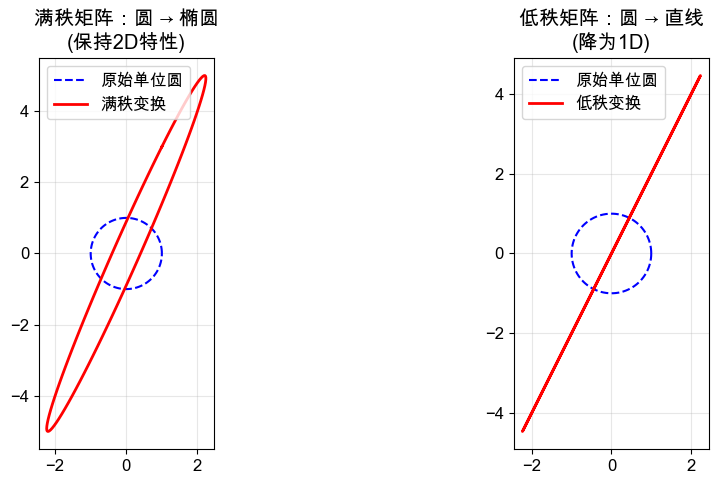


‰ΩéÁß©Ëøë‰ººÔºàLow-Rank ApproximationÔºâ

2. ‰ªÄ‰πàÊòØ‰ΩéÁß©Ëøë‰ººÔºü
‰ΩéÁß©Ëøë‰ºº = Áî®‰∏Ä‰∏™Áß©Êõ¥Â∞èÁöÑÁü©ÈòµÊù•Ëøë‰ººÂéüÂßãÁü©Èòµ
ÁõÆÁöÑÔºöÂáèÂ∞ëÊï∞ÊçÆÈáèÔºåÂéªÈô§Âô™Â£∞ÔºåÊèêÂèñ‰∏ªË¶Å‰ø°ÊÅØ

Ê≠•È™§1: ÂàõÂª∫ÁúüÂÆûÁöÑ‰ΩéÁß©Êï∞ÊçÆ
ÁúüÂÆûÊï∞ÊçÆÁü©ÈòµÂ§ßÂ∞è: (50, 40)
ÁúüÂÆûÁß©: 3

Ê≠•È™§2: Ê∑ªÂä†Âô™Â£∞
Âô™Â£∞Ê∞¥Âπ≥: 0.2
‰ø°Âô™ÊØî: 8.96

Ê≠•È™§3: ÂØπÂ∏¶Âô™Â£∞Êï∞ÊçÆËøõË°åSVD
Ââç10‰∏™Â•áÂºÇÂÄº: [60.24832204 43.53684266 27.34133353  2.54487336  2.23754909  2.20715363
  2.0734869   2.03331909  1.93908738  1.8883944 ]
ÁúüÂÆû‰ø°Âè∑Â∫îËØ•Âè™ÊúâÂâç3‰∏™Â•áÂºÇÂÄºËæÉÂ§ß

Ê≠•È™§4: Â∞ùËØï‰∏çÂêåÁöÑÁß©Ëøë‰ºº
Áß©-1 Ëøë‰ºº:
  vs ÁúüÂÆûÊï∞ÊçÆËØØÂ∑Æ: 51.6567
  vs Âô™Â£∞Êï∞ÊçÆËØØÂ∑Æ: 52.0713
Áß©-3 Ëøë‰ºº:
  vs ÁúüÂÆûÊï∞ÊçÆËØØÂ∑Æ: 3.1183
  vs Âô™Â£∞Êï∞ÊçÆËØØÂ∑Æ: 8.2714
Áß©-10 Ëøë‰ºº:
  vs ÁúüÂÆûÊï∞ÊçÆËØØÂ∑Æ: 6.4699
  vs Âô™Â£∞Êï∞ÊçÆËØØÂ∑Æ: 6.0250


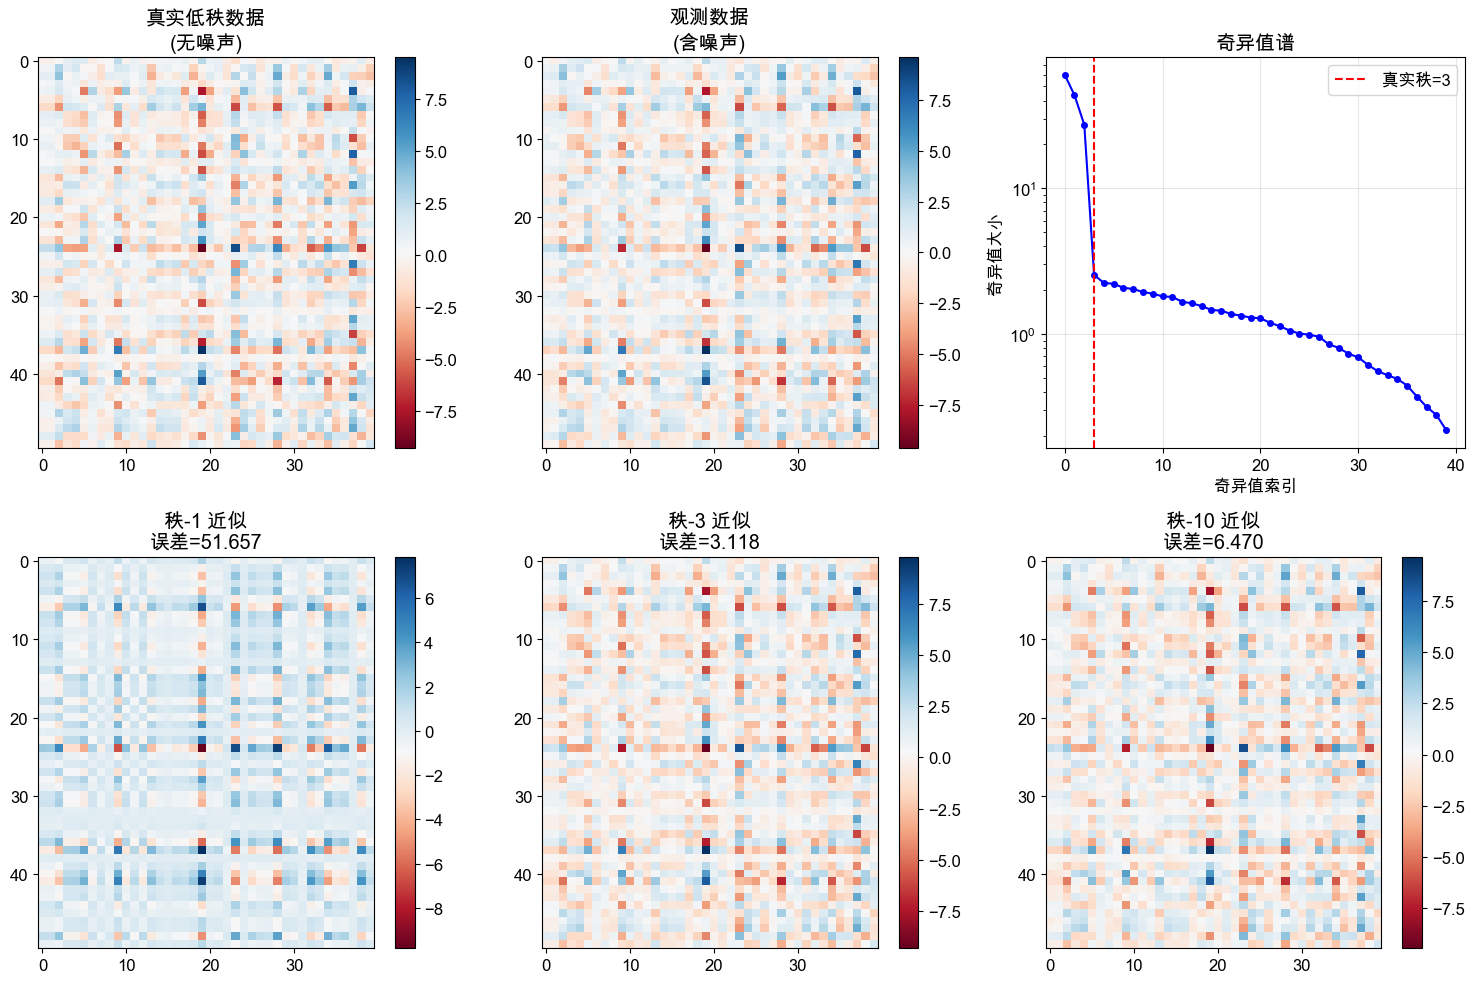


‰ΩéÁß©Ëøë‰ººÁöÑÂéãÁº©ÊïàÊûú

ÂéüÂßãÁü©ÈòµÂ§ßÂ∞è: 100 √ó 80 = 8000 ‰∏™ÂÖÉÁ¥†

‰∏çÂêåÁß©Ëøë‰ººÁöÑÂ≠òÂÇ®ÈúÄÊ±Ç:
Áß©r | UÁü©Èòµ | Â•áÂºÇÂÄº | V^TÁü©Èòµ | ÊÄªËÆ° | ÂéãÁº©ÊØî
-------------------------------------------------------
 1   |  100  |    1   |    80   |  181 | 44.2x
 5   |  500  |    5   |   400   |  905 | 8.8x
10   | 1000  |   10   |   800   | 1810 | 4.4x
20   | 2000  |   20   |  1600   | 3620 | 2.2x
40   | 4000  |   40   |  3200   | 7240 | 1.1x


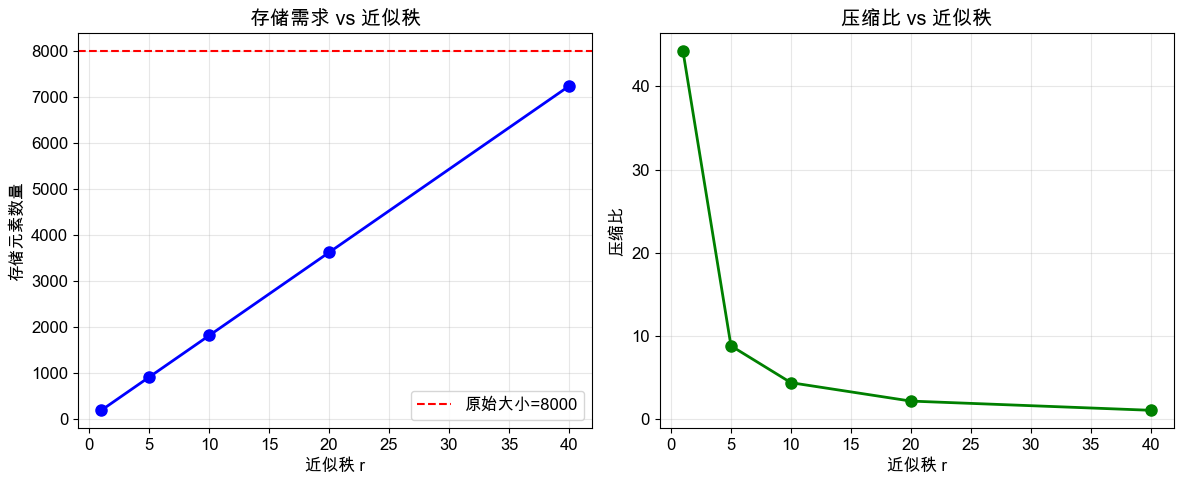


ÁúüÂÆûÂ∫îÁî®ÔºöÂõæÂÉèÂéãÁº©
ÂõæÂÉèÂ§ßÂ∞è: (60, 50)
ÂéüÂßãÊï∞ÊçÆÈáè: 3000 ÂÉèÁ¥†

Áß©-1 ÂéãÁº©:
  ÂéãÁº©ÊØî: 27.0x
  ÂùáÊñπËØØÂ∑Æ: 0.069183
  ËÉΩÈáè‰øùÁïô: 79.9%

Áß©-5 ÂéãÁº©:
  ÂéãÁº©ÊØî: 5.4x
  ÂùáÊñπËØØÂ∑Æ: 0.007350
  ËÉΩÈáè‰øùÁïô: 97.9%

Áß©-20 ÂéãÁº©:
  ÂéãÁº©ÊØî: 1.4x
  ÂùáÊñπËØØÂ∑Æ: 0.002303
  ËÉΩÈáè‰øùÁïô: 99.3%


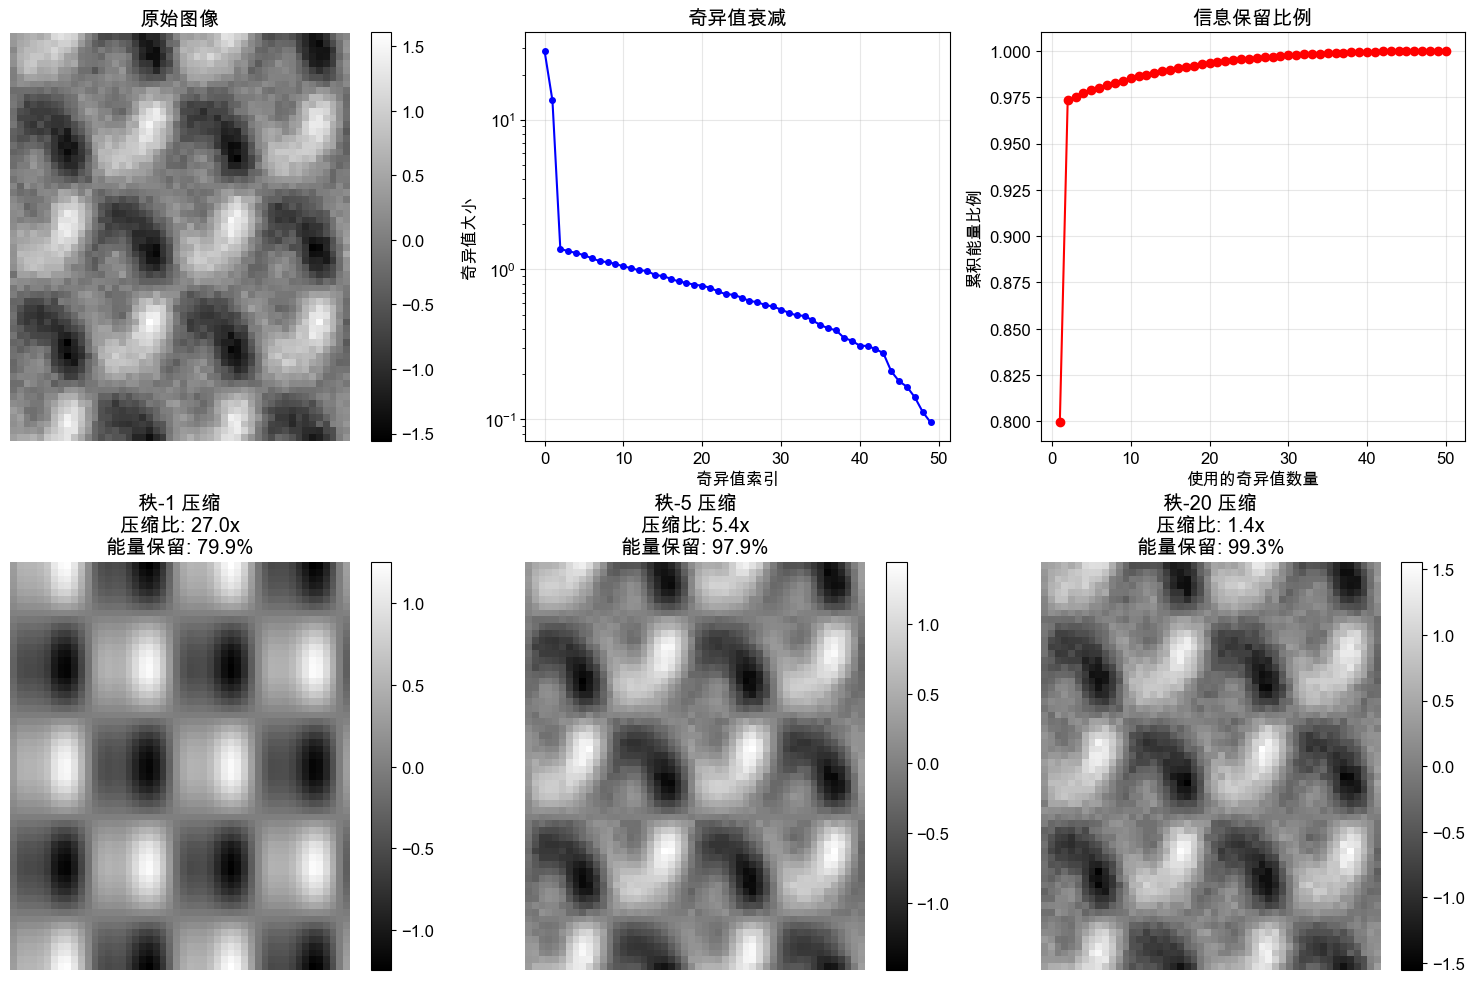


‰∏∫‰ªÄ‰πàSVDÊòØÊúÄ‰ºòÁöÑ‰ΩéÁß©Ëøë‰ººÔºü

3. SVDÁöÑÊúÄ‰ºòÊÄßË¥®Ôºö
‚Ä¢ ÂØπ‰∫é‰ªªÊÑèÁü©ÈòµAÔºåSVDÁªôÂá∫ÁöÑÁß©-rËøë‰ººÊòØÊúÄ‰ºòÁöÑ
‚Ä¢ ËøôÊÑèÂë≥ÁùÄÂú®ÊâÄÊúâÁß©‰∏∫rÁöÑÁü©Èòµ‰∏≠ÔºåSVDÈáçÊûÑÁöÑËØØÂ∑ÆÊúÄÂ∞è
‚Ä¢ Ëøô‰∏™ÁªìÊûúË¢´Áß∞‰∏∫ Eckart-Young ÂÆöÁêÜ

4. Áõ¥ËßÇËß£ÈáäÔºö
‚Ä¢ Â•áÂºÇÂÄºÊåâÂ§ßÂ∞èÊéíÂ∫èÔºöœÉ‚ÇÅ ‚â• œÉ‚ÇÇ ‚â• ... ‚â• œÉ·µ£
‚Ä¢ Â§ßÁöÑÂ•áÂºÇÂÄºÂØπÂ∫î'ÈáçË¶Å'ÁöÑ‰ø°ÊÅØ
‚Ä¢ Â∞èÁöÑÂ•áÂºÇÂÄºÂØπÂ∫î'Ê¨°Ë¶Å'ÁöÑ‰ø°ÊÅØÊàñÂô™Â£∞
‚Ä¢ ‰øùÁïôÂâçr‰∏™Â•áÂºÇÂÄº = ‰øùÁïôÊúÄÈáçË¶ÅÁöÑ‰ø°ÊÅØ


/opt/homebrew/anaconda3/envs/ml-dl-fullstack-guide/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 7522 (\N{LATIN SUBSCRIPT SMALL LETTER I}) missing from font(s) Arial Unicode MS.
  fig.canvas.print_figure(bytes_io, **kw)


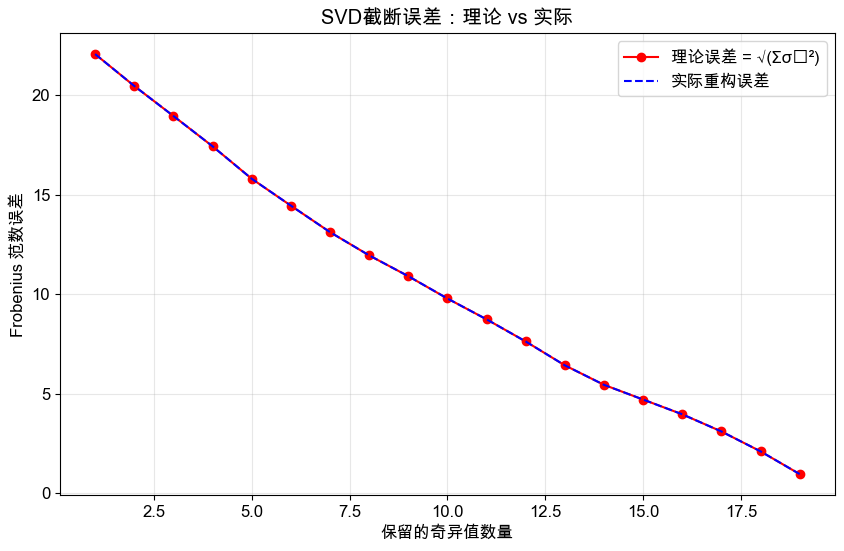


È™åËØÅÔºöÁêÜËÆ∫ÂíåÂÆûÈôÖËØØÂ∑ÆÁöÑÊúÄÂ§ßÂ∑ÆÂºÇ = 1.07e-14
ÔºàÂ∫îËØ•Êé•Ëøë0ÔºåËØÅÊòéÁêÜËÆ∫ÁöÑÊ≠£Á°ÆÊÄßÔºâ

üéâ ÊïôÁ®ãÊÄªÁªì

ÂÖ≥ÈîÆË¶ÅÁÇπ:
1Ô∏è‚É£ Áü©ÈòµÁöÑÁß© = Áã¨Á´ã‰ø°ÊÅØÁöÑÊï∞Èáè
2Ô∏è‚É£ ‰ΩéÁß©Ëøë‰ºº = Áî®Êõ¥ÁÆÄÂçïÁöÑÁü©ÈòµËøë‰ººÂ§çÊùÇÁü©Èòµ
3Ô∏è‚É£ SVDËá™Âä®ÊåâÈáçË¶ÅÊÄßÊéíÂ∫è‰ø°ÊÅØÔºàÂ§ßÂ•áÂºÇÂÄº = ÈáçË¶Å‰ø°ÊÅØÔºâ
4Ô∏è‚É£ Êà™Êñ≠SVD = Âè™‰øùÁïôÊúÄÈáçË¶ÅÁöÑ‰ø°ÊÅØÔºå‰∏¢ÂºÉÂô™Â£∞
5Ô∏è‚É£ Â∫îÁî®ÔºöÊï∞ÊçÆÂéãÁº©„ÄÅÈôçÂô™„ÄÅÁâπÂæÅÊèêÂèñ„ÄÅÊé®ËçêÁ≥ªÁªüÁ≠â

ÂÆûÈôÖÂ∫îÁî®Âú∫ÊôØ:
üì± ÂõæÂÉè/ËßÜÈ¢ëÂéãÁº©
üîç Êï∞ÊçÆÈôçÁª¥ÂíåÂèØËßÜÂåñ
üéµ Èü≥È¢ë‰ø°Âè∑Â§ÑÁêÜ
üí° Êé®ËçêÁ≥ªÁªüÔºàNetflix„ÄÅAmazonÔºâ
üß¨ ÁîüÁâ©‰ø°ÊÅØÂ≠¶ÔºàÂü∫Âõ†Ë°®ËææÂàÜÊûêÔºâ
üìä ÈáëËûçÊï∞ÊçÆÂàÜÊûê


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.family'] = 'Arial Unicode MS' 
plt.rcParams['font.size'] = 12

def explain_matrix_rank_concept():
    """Ëß£ÈáäÁü©ÈòµÁß©ÁöÑÊ¶ÇÂøµ"""
    
    print("=" * 60)
    print("Áü©ÈòµÁß©ÔºàRankÔºâÁöÑÊ¶ÇÂøµ")
    print("=" * 60)
    
    print("\n1. ‰ªÄ‰πàÊòØÁü©ÈòµÁöÑÁß©Ôºü")
    print("Áü©ÈòµÁöÑÁß© = Á∫øÊÄßÊó†ÂÖ≥ÁöÑË°åÔºàÊàñÂàóÔºâÁöÑÊúÄÂ§ßÊï∞ÁõÆ")
    print("‰πüÂ∞±ÊòØËØ¥ÔºåÁß©ÂëäËØâÊàë‰ª¨Áü©Èòµ‰∏≠ÊúâÂ§öÂ∞ë'Áã¨Á´ã‰ø°ÊÅØ'")
    
    # Á§∫‰æã1: Êª°Áß©Áü©Èòµ
    A_full = np.array([[1, 2], 
                       [3, 4]])
    print(f"\nÁ§∫‰æã1 - Êª°Áß©Áü©Èòµ:")
    print(f"A = \n{A_full}")
    print(f"Áü©ÈòµÂ§ßÂ∞è: {A_full.shape}, ÁêÜËÆ∫ÊúÄÂ§ßÁß©: {min(A_full.shape)}")
    
    U, s, VT = np.linalg.svd(A_full)
    rank_A = np.sum(s > 1e-10)  # Êï∞ÂÄºÁß©
    print(f"Â•áÂºÇÂÄº: {s}")
    print(f"ÂÆûÈôÖÁß©: {rank_A} (ÊâÄÊúâÂ•áÂºÇÂÄºÈÉΩÂ§ß‰∫é0)")
    
    # Á§∫‰æã2: ‰ΩéÁß©Áü©Èòµ
    A_low = np.array([[1, 2], 
                      [2, 4]])  # Á¨¨‰∫åË°åÊòØÁ¨¨‰∏ÄË°åÁöÑ2ÂÄç
    print(f"\nÁ§∫‰æã2 - ‰ΩéÁß©Áü©Èòµ:")
    print(f"A = \n{A_low}")
    print(f"Áü©ÈòµÂ§ßÂ∞è: {A_low.shape}, ÁêÜËÆ∫ÊúÄÂ§ßÁß©: {min(A_low.shape)}")
    
    U, s, VT = np.linalg.svd(A_low)
    rank_A = np.sum(s > 1e-10)
    print(f"Â•áÂºÇÂÄº: {s}")
    print(f"ÂÆûÈôÖÁß©: {rank_A} (Êúâ‰∏Ä‰∏™Â•áÂºÇÂÄºÊé•Ëøë0)")
    
    # ÂèØËßÜÂåñ
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Êª°Áß©Áü©ÈòµÁöÑÂèòÊç¢ÊïàÊûú
    theta = np.linspace(0, 2*np.pi, 100)
    unit_circle = np.array([np.cos(theta), np.sin(theta)])
    
    transformed_full = A_full @ unit_circle
    transformed_low = A_low @ unit_circle
    
    axes[0].plot(unit_circle[0], unit_circle[1], 'b--', label='ÂéüÂßãÂçï‰ΩçÂúÜ')
    axes[0].plot(transformed_full[0], transformed_full[1], 'r-', linewidth=2, label='Êª°Áß©ÂèòÊç¢')
    axes[0].set_aspect('equal')
    axes[0].set_title('Êª°Áß©Áü©ÈòµÔºöÂúÜ ‚Üí Ê§≠ÂúÜ\n(‰øùÊåÅ2DÁâπÊÄß)')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    axes[1].plot(unit_circle[0], unit_circle[1], 'b--', label='ÂéüÂßãÂçï‰ΩçÂúÜ')
    axes[1].plot(transformed_low[0], transformed_low[1], 'r-', linewidth=2, label='‰ΩéÁß©ÂèòÊç¢')
    axes[1].set_aspect('equal')
    axes[1].set_title('‰ΩéÁß©Áü©ÈòµÔºöÂúÜ ‚Üí Áõ¥Á∫ø\n(Èôç‰∏∫1D)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def explain_low_rank_approximation():
    """Ëß£Èáä‰ΩéÁß©Ëøë‰ººÁöÑÂéüÁêÜ"""
    
    print("\n" + "=" * 60)
    print("‰ΩéÁß©Ëøë‰ººÔºàLow-Rank ApproximationÔºâ")
    print("=" * 60)
    
    print("\n2. ‰ªÄ‰πàÊòØ‰ΩéÁß©Ëøë‰ººÔºü")
    print("‰ΩéÁß©Ëøë‰ºº = Áî®‰∏Ä‰∏™Áß©Êõ¥Â∞èÁöÑÁü©ÈòµÊù•Ëøë‰ººÂéüÂßãÁü©Èòµ")
    print("ÁõÆÁöÑÔºöÂáèÂ∞ëÊï∞ÊçÆÈáèÔºåÂéªÈô§Âô™Â£∞ÔºåÊèêÂèñ‰∏ªË¶Å‰ø°ÊÅØ")
    
    # ÂàõÂª∫‰∏Ä‰∏™ÁúüÂÆûÁöÑ‰ΩéÁß©Áü©ÈòµÂä†Âô™Â£∞ÁöÑ‰æãÂ≠ê
    np.random.seed(42)
    
    # Ê≠•È™§1: ÂàõÂª∫ÁúüÂÆûÁöÑ‰ΩéÁß©ÁªìÊûÑ
    print("\nÊ≠•È™§1: ÂàõÂª∫ÁúüÂÆûÁöÑ‰ΩéÁß©Êï∞ÊçÆ")
    m, n = 50, 40
    true_rank = 3
    
    # ÁúüÂÆûÁöÑ‰ΩéÁß©Áü©Èòµ = U_true @ V_true^T
    U_true = np.random.randn(m, true_rank)
    V_true = np.random.randn(n, true_rank)
    A_clean = U_true @ V_true.T
    
    print(f"ÁúüÂÆûÊï∞ÊçÆÁü©ÈòµÂ§ßÂ∞è: {A_clean.shape}")
    print(f"ÁúüÂÆûÁß©: {true_rank}")
    
    # Ê≠•È™§2: Ê∑ªÂä†Âô™Â£∞
    print("\nÊ≠•È™§2: Ê∑ªÂä†Âô™Â£∞")
    noise_level = 0.2
    noise = noise_level * np.random.randn(m, n)
    A_noisy = A_clean + noise
    
    print(f"Âô™Â£∞Ê∞¥Âπ≥: {noise_level}")
    print(f"‰ø°Âô™ÊØî: {np.linalg.norm(A_clean) / np.linalg.norm(noise):.2f}")
    
    # Ê≠•È™§3: SVDÂàÜËß£
    print("\nÊ≠•È™§3: ÂØπÂ∏¶Âô™Â£∞Êï∞ÊçÆËøõË°åSVD")
    U, s, VT = np.linalg.svd(A_noisy, full_matrices=False)
    
    print(f"Ââç10‰∏™Â•áÂºÇÂÄº: {s[:10]}")
    print(f"ÁúüÂÆû‰ø°Âè∑Â∫îËØ•Âè™ÊúâÂâç{true_rank}‰∏™Â•áÂºÇÂÄºËæÉÂ§ß")
    
    # Ê≠•È™§4: ‰∏çÂêåÁß©ÁöÑËøë‰ºº
    print("\nÊ≠•È™§4: Â∞ùËØï‰∏çÂêåÁöÑÁß©Ëøë‰ºº")
    
    ranks_to_try = [1, 2, 3, 5, 10]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # ÂéüÂßãÊï∞ÊçÆÂèØËßÜÂåñ
    im0 = axes[0, 0].imshow(A_clean, cmap='RdBu', aspect='auto')
    axes[0, 0].set_title('ÁúüÂÆû‰ΩéÁß©Êï∞ÊçÆ\n(Êó†Âô™Â£∞)')
    plt.colorbar(im0, ax=axes[0, 0])
    
    im1 = axes[0, 1].imshow(A_noisy, cmap='RdBu', aspect='auto')
    axes[0, 1].set_title('ËßÇÊµãÊï∞ÊçÆ\n(Âê´Âô™Â£∞)')
    plt.colorbar(im1, ax=axes[0, 1])
    
    # Â•áÂºÇÂÄºË∞±
    axes[0, 2].semilogy(s, 'bo-', markersize=4)
    axes[0, 2].axvline(true_rank, color='red', linestyle='--', 
                      label=f'ÁúüÂÆûÁß©={true_rank}')
    axes[0, 2].set_xlabel('Â•áÂºÇÂÄºÁ¥¢Âºï')
    axes[0, 2].set_ylabel('Â•áÂºÇÂÄºÂ§ßÂ∞è')
    axes[0, 2].set_title('Â•áÂºÇÂÄºË∞±')
    axes[0, 2].legend()
    axes[0, 2].grid(True, alpha=0.3)
    
    # ‰∏çÂêåÁß©ÁöÑÈáçÊûÑÁªìÊûú
    reconstruction_errors = []
    
    for i, rank in enumerate([1, 3, 10]):
        # ‰ΩéÁß©Ëøë‰ºº: Âè™‰øùÁïôÂâçrank‰∏™Â•áÂºÇÂÄº
        A_approx = U[:, :rank] @ np.diag(s[:rank]) @ VT[:rank, :]
        
        # ËÆ°ÁÆóÈáçÊûÑËØØÂ∑Æ
        error_vs_clean = np.linalg.norm(A_clean - A_approx, 'fro')
        error_vs_noisy = np.linalg.norm(A_noisy - A_approx, 'fro')
        
        reconstruction_errors.append({
            'rank': rank,
            'error_vs_clean': error_vs_clean,
            'error_vs_noisy': error_vs_noisy
        })
        
        # ÂèØËßÜÂåñ
        im = axes[1, i].imshow(A_approx, cmap='RdBu', aspect='auto')
        axes[1, i].set_title(f'Áß©-{rank} Ëøë‰ºº\nËØØÂ∑Æ={error_vs_clean:.3f}')
        plt.colorbar(im, ax=axes[1, i])
        
        print(f"Áß©-{rank} Ëøë‰ºº:")
        print(f"  vs ÁúüÂÆûÊï∞ÊçÆËØØÂ∑Æ: {error_vs_clean:.4f}")
        print(f"  vs Âô™Â£∞Êï∞ÊçÆËØØÂ∑Æ: {error_vs_noisy:.4f}")
    
    plt.tight_layout()
    plt.show()
    
    return A_clean, A_noisy, U, s, VT, reconstruction_errors

def demonstrate_compression_effect():
    """ÊºîÁ§∫ÂéãÁº©ÊïàÊûú"""
    
    print("\n" + "=" * 60)
    print("‰ΩéÁß©Ëøë‰ººÁöÑÂéãÁº©ÊïàÊûú")
    print("=" * 60)
    
    # ÂéüÂßãÁü©ÈòµÂ§ßÂ∞è
    m, n = 100, 80
    original_elements = m * n
    
    print(f"\nÂéüÂßãÁü©ÈòµÂ§ßÂ∞è: {m} √ó {n} = {original_elements} ‰∏™ÂÖÉÁ¥†")
    
    # ‰∏çÂêåÁß©Ëøë‰ººÊâÄÈúÄÁöÑÂ≠òÂÇ®Á©∫Èó¥
    ranks = [1, 5, 10, 20, 40]
    
    print("\n‰∏çÂêåÁß©Ëøë‰ººÁöÑÂ≠òÂÇ®ÈúÄÊ±Ç:")
    print("Áß©r | UÁü©Èòµ | Â•áÂºÇÂÄº | V^TÁü©Èòµ | ÊÄªËÆ° | ÂéãÁº©ÊØî")
    print("-" * 55)
    
    for r in ranks:
        u_elements = m * r  # UÁü©Èòµ: m√ór
        s_elements = r      # Â•áÂºÇÂÄº: r‰∏™
        vt_elements = r * n # V^TÁü©Èòµ: r√ón
        total_elements = u_elements + s_elements + vt_elements
        compression_ratio = original_elements / total_elements
        
        print(f"{r:2d}   | {u_elements:4d}  |   {s_elements:2d}   |  {vt_elements:4d}   | {total_elements:4d} | {compression_ratio:.1f}x")
    
    # ÂèØËßÜÂåñÂéãÁº©ÊØî
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Â≠òÂÇ®ÈúÄÊ±Ç
    total_storage = [m*r + r + r*n for r in ranks]
    axes[0].plot(ranks, total_storage, 'bo-', linewidth=2, markersize=8)
    axes[0].axhline(original_elements, color='red', linestyle='--', 
                   label=f'ÂéüÂßãÂ§ßÂ∞è={original_elements}')
    axes[0].set_xlabel('Ëøë‰ººÁß© r')
    axes[0].set_ylabel('Â≠òÂÇ®ÂÖÉÁ¥†Êï∞Èáè')
    axes[0].set_title('Â≠òÂÇ®ÈúÄÊ±Ç vs Ëøë‰ººÁß©')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # ÂéãÁº©ÊØî
    compression_ratios = [original_elements / storage for storage in total_storage]
    axes[1].plot(ranks, compression_ratios, 'go-', linewidth=2, markersize=8)
    axes[1].set_xlabel('Ëøë‰ººÁß© r')
    axes[1].set_ylabel('ÂéãÁº©ÊØî')
    axes[1].set_title('ÂéãÁº©ÊØî vs Ëøë‰ººÁß©')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def real_world_example_image_compression():
    """ÁúüÂÆû‰∏ñÁïå‰æãÂ≠êÔºöÂõæÂÉèÂéãÁº©"""
    
    print("\n" + "=" * 60)
    print("ÁúüÂÆûÂ∫îÁî®ÔºöÂõæÂÉèÂéãÁº©")
    print("=" * 60)
    
    # ÂàõÂª∫‰∏Ä‰∏™ÁÆÄÂçïÁöÑ"ÂõæÂÉè"ÔºàÂÆûÈôÖ‰∏äÊòØ‰∏Ä‰∏™ÊúâÁªìÊûÑÁöÑÁü©ÈòµÔºâ
    np.random.seed(42)
    
    # ÂàõÂª∫‰∏Ä‰∏™ÊúâÁªìÊûÑÁöÑÂõæÂÉèÊ®°Êãü
    x = np.linspace(0, 4*np.pi, 50)
    y = np.linspace(0, 4*np.pi, 60)
    X, Y = np.meshgrid(x, y)
    
    # ÁªÑÂêàÂá†‰∏™ÁÆÄÂçïÁöÑÊ®°Âºè
    image = (np.sin(X) * np.cos(Y) + 
             0.5 * np.sin(2*X) * np.sin(2*Y) + 
             0.3 * np.cos(3*X) * np.cos(Y))
    
    # Ê∑ªÂä†Â∞ëÈáèÂô™Â£∞
    image += 0.1 * np.random.randn(*image.shape)
    
    print(f"ÂõæÂÉèÂ§ßÂ∞è: {image.shape}")
    print(f"ÂéüÂßãÊï∞ÊçÆÈáè: {image.size} ÂÉèÁ¥†")
    
    # SVDÂàÜËß£
    U, s, VT = np.linalg.svd(image, full_matrices=False)
    
    # ‰∏çÂêåÂéãÁº©Á∫ßÂà´
    compression_ranks = [1, 3, 5, 10, 20]
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # ÂéüÂßãÂõæÂÉè
    im0 = axes[0, 0].imshow(image, cmap='gray')
    axes[0, 0].set_title('ÂéüÂßãÂõæÂÉè')
    axes[0, 0].axis('off')
    plt.colorbar(im0, ax=axes[0, 0])
    
    # Â•áÂºÇÂÄº
    axes[0, 1].semilogy(s, 'bo-', markersize=4)
    axes[0, 1].set_xlabel('Â•áÂºÇÂÄºÁ¥¢Âºï')
    axes[0, 1].set_ylabel('Â•áÂºÇÂÄºÂ§ßÂ∞è')
    axes[0, 1].set_title('Â•áÂºÇÂÄºË°∞Âáè')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Á¥ØÁßØËÉΩÈáè
    cumulative_energy = np.cumsum(s**2) / np.sum(s**2)
    axes[0, 2].plot(range(1, len(cumulative_energy)+1), cumulative_energy, 'ro-')
    axes[0, 2].set_xlabel('‰ΩøÁî®ÁöÑÂ•áÂºÇÂÄºÊï∞Èáè')
    axes[0, 2].set_ylabel('Á¥ØÁßØËÉΩÈáèÊØî‰æã')
    axes[0, 2].set_title('‰ø°ÊÅØ‰øùÁïôÊØî‰æã')
    axes[0, 2].grid(True, alpha=0.3)
    
    # ‰∏çÂêåÂéãÁº©Á∫ßÂà´ÁöÑÁªìÊûú
    for i, rank in enumerate([1, 5, 20]):
        # ÈáçÊûÑÂõæÂÉè
        image_compressed = U[:, :rank] @ np.diag(s[:rank]) @ VT[:rank, :]
        
        # ËÆ°ÁÆóÂéãÁº©ÊØîÂíåËØØÂ∑Æ
        compression_ratio = image.size / (U.shape[0]*rank + rank + VT.shape[1]*rank)
        mse = np.mean((image - image_compressed)**2)
        energy_retained = np.sum(s[:rank]**2) / np.sum(s**2)
        
        # ÊòæÁ§∫
        im = axes[1, i].imshow(image_compressed, cmap='gray')
        axes[1, i].set_title(f'Áß©-{rank} ÂéãÁº©\nÂéãÁº©ÊØî: {compression_ratio:.1f}x\nËÉΩÈáè‰øùÁïô: {energy_retained:.1%}')
        axes[1, i].axis('off')
        plt.colorbar(im, ax=axes[1, i])
        
        print(f"\nÁß©-{rank} ÂéãÁº©:")
        print(f"  ÂéãÁº©ÊØî: {compression_ratio:.1f}x")
        print(f"  ÂùáÊñπËØØÂ∑Æ: {mse:.6f}")
        print(f"  ËÉΩÈáè‰øùÁïô: {energy_retained:.1%}")
    
    plt.tight_layout()
    plt.show()

def why_svd_works_for_approximation():
    """Ëß£Èáä‰∏∫‰ªÄ‰πàSVDÈÄÇÂêàÂÅö‰ΩéÁß©Ëøë‰ºº"""
    
    print("\n" + "=" * 60)
    print("‰∏∫‰ªÄ‰πàSVDÊòØÊúÄ‰ºòÁöÑ‰ΩéÁß©Ëøë‰ººÔºü")
    print("=" * 60)
    
    print("\n3. SVDÁöÑÊúÄ‰ºòÊÄßË¥®Ôºö")
    print("‚Ä¢ ÂØπ‰∫é‰ªªÊÑèÁü©ÈòµAÔºåSVDÁªôÂá∫ÁöÑÁß©-rËøë‰ººÊòØÊúÄ‰ºòÁöÑ")
    print("‚Ä¢ ËøôÊÑèÂë≥ÁùÄÂú®ÊâÄÊúâÁß©‰∏∫rÁöÑÁü©Èòµ‰∏≠ÔºåSVDÈáçÊûÑÁöÑËØØÂ∑ÆÊúÄÂ∞è")
    print("‚Ä¢ Ëøô‰∏™ÁªìÊûúË¢´Áß∞‰∏∫ Eckart-Young ÂÆöÁêÜ")
    
    # Êï∞Â≠¶ËØÅÊòéÁöÑÁõ¥ËßÇËß£Èáä
    print("\n4. Áõ¥ËßÇËß£ÈáäÔºö")
    print("‚Ä¢ Â•áÂºÇÂÄºÊåâÂ§ßÂ∞èÊéíÂ∫èÔºöœÉ‚ÇÅ ‚â• œÉ‚ÇÇ ‚â• ... ‚â• œÉ·µ£")
    print("‚Ä¢ Â§ßÁöÑÂ•áÂºÇÂÄºÂØπÂ∫î'ÈáçË¶Å'ÁöÑ‰ø°ÊÅØ")
    print("‚Ä¢ Â∞èÁöÑÂ•áÂºÇÂÄºÂØπÂ∫î'Ê¨°Ë¶Å'ÁöÑ‰ø°ÊÅØÊàñÂô™Â£∞")
    print("‚Ä¢ ‰øùÁïôÂâçr‰∏™Â•áÂºÇÂÄº = ‰øùÁïôÊúÄÈáçË¶ÅÁöÑ‰ø°ÊÅØ")
    
    # ÊºîÁ§∫‰∏çÂêåËøë‰ººÁöÑËØØÂ∑Æ
    np.random.seed(42)
    A = np.random.randn(30, 20)
    U, s, VT = np.linalg.svd(A, full_matrices=False)
    
    # ËÆ°ÁÆóÊà™Êñ≠ËØØÂ∑ÆÔºàÁêÜËÆ∫ÂÄºÔºâ
    ranks = range(1, min(A.shape))
    theoretical_errors = [np.sqrt(np.sum(s[r:]**2)) for r in ranks]
    
    # È™åËØÅÂÆûÈôÖËØØÂ∑Æ
    actual_errors = []
    for r in ranks:
        A_approx = U[:, :r] @ np.diag(s[:r]) @ VT[:r, :]
        error = np.linalg.norm(A - A_approx, 'fro')
        actual_errors.append(error)
    
    # ÂèØËßÜÂåñ
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, theoretical_errors, 'ro-', label='ÁêÜËÆ∫ËØØÂ∑Æ = ‚àö(Œ£œÉ·µ¢¬≤)')
    plt.plot(ranks, actual_errors, 'b--', label='ÂÆûÈôÖÈáçÊûÑËØØÂ∑Æ')
    plt.xlabel('‰øùÁïôÁöÑÂ•áÂºÇÂÄºÊï∞Èáè')
    plt.ylabel('Frobenius ËåÉÊï∞ËØØÂ∑Æ')
    plt.title('SVDÊà™Êñ≠ËØØÂ∑ÆÔºöÁêÜËÆ∫ vs ÂÆûÈôÖ')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"\nÈ™åËØÅÔºöÁêÜËÆ∫ÂíåÂÆûÈôÖËØØÂ∑ÆÁöÑÊúÄÂ§ßÂ∑ÆÂºÇ = {np.max(np.abs(np.array(theoretical_errors) - np.array(actual_errors))):.2e}")
    print("ÔºàÂ∫îËØ•Êé•Ëøë0ÔºåËØÅÊòéÁêÜËÆ∫ÁöÑÊ≠£Á°ÆÊÄßÔºâ")

def main_tutorial():
    """ÂÆåÊï¥ÁöÑÊïôÁ®ã"""
    
    print("üéØ SVD‰ΩéÁß©Ëøë‰ººÂÆåÊï¥ÊïôÁ®ã")
    print("=" * 60)
    
    # 1. Âü∫Êú¨Ê¶ÇÂøµ
    explain_matrix_rank_concept()
    
    # 2. ‰ΩéÁß©Ëøë‰ººÂéüÁêÜ
    A_clean, A_noisy, U, s, VT, errors = explain_low_rank_approximation()
    
    # 3. ÂéãÁº©ÊïàÊûú
    demonstrate_compression_effect()
    
    # 4. ÂÆûÈôÖÂ∫îÁî®
    real_world_example_image_compression()
    
    # 5. ÁêÜËÆ∫Âü∫Á°Ä
    why_svd_works_for_approximation()
    
    print("\n" + "=" * 60)
    print("üéâ ÊïôÁ®ãÊÄªÁªì")
    print("=" * 60)
    print("\nÂÖ≥ÈîÆË¶ÅÁÇπ:")
    print("1Ô∏è‚É£ Áü©ÈòµÁöÑÁß© = Áã¨Á´ã‰ø°ÊÅØÁöÑÊï∞Èáè")
    print("2Ô∏è‚É£ ‰ΩéÁß©Ëøë‰ºº = Áî®Êõ¥ÁÆÄÂçïÁöÑÁü©ÈòµËøë‰ººÂ§çÊùÇÁü©Èòµ")
    print("3Ô∏è‚É£ SVDËá™Âä®ÊåâÈáçË¶ÅÊÄßÊéíÂ∫è‰ø°ÊÅØÔºàÂ§ßÂ•áÂºÇÂÄº = ÈáçË¶Å‰ø°ÊÅØÔºâ")
    print("4Ô∏è‚É£ Êà™Êñ≠SVD = Âè™‰øùÁïôÊúÄÈáçË¶ÅÁöÑ‰ø°ÊÅØÔºå‰∏¢ÂºÉÂô™Â£∞")
    print("5Ô∏è‚É£ Â∫îÁî®ÔºöÊï∞ÊçÆÂéãÁº©„ÄÅÈôçÂô™„ÄÅÁâπÂæÅÊèêÂèñ„ÄÅÊé®ËçêÁ≥ªÁªüÁ≠â")
    
    print("\nÂÆûÈôÖÂ∫îÁî®Âú∫ÊôØ:")
    print("üì± ÂõæÂÉè/ËßÜÈ¢ëÂéãÁº©")
    print("üîç Êï∞ÊçÆÈôçÁª¥ÂíåÂèØËßÜÂåñ") 
    print("üéµ Èü≥È¢ë‰ø°Âè∑Â§ÑÁêÜ")
    print("üí° Êé®ËçêÁ≥ªÁªüÔºàNetflix„ÄÅAmazonÔºâ")
    print("üß¨ ÁîüÁâ©‰ø°ÊÅØÂ≠¶ÔºàÂü∫Âõ†Ë°®ËææÂàÜÊûêÔºâ")
    print("üìä ÈáëËûçÊï∞ÊçÆÂàÜÊûê")

if __name__ == "__main__":
    main_tutorial()

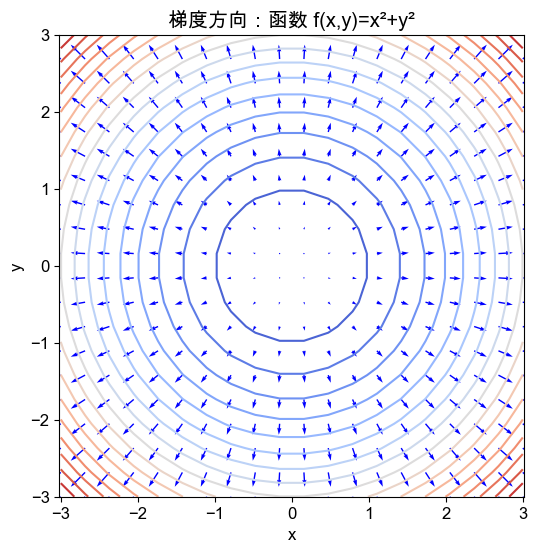

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰Ωì
plt.rcParams['font.family'] = 'Arial Unicode MS' 
plt.rcParams['font.size'] = 12

# ÂÆö‰πâÂáΩÊï∞ÂíåÊ¢ØÂ∫¶
def f(x, y):
    return x**2 + y**2  # ÁÆÄÂçïÁöÑÂá∏ÂáΩÊï∞

def grad_f(x, y):
    return np.array([2*x, 2*y])  # Ê¢ØÂ∫¶

# ÁΩëÊ†º
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# ËÆ°ÁÆóÊ¢ØÂ∫¶
U, V = grad_f(X, Y)

plt.figure(figsize=(6,6))
plt.contour(X, Y, Z, levels=20, cmap='coolwarm')  # Á≠âÈ´òÁ∫ø
plt.quiver(X, Y, U, V, color='blue')  # Ê¢ØÂ∫¶ÊñπÂêë
plt.title("Ê¢ØÂ∫¶ÊñπÂêëÔºöÂáΩÊï∞ f(x,y)=x¬≤+y¬≤")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.show()
